We can start by assuming that there are 4 categories: Basics, evolutions, final evolutions and legendaries. This is kinda vague since there are some evolutions that belong to other category that is not the same as its targuet. This motivates the idea of clustering and, at the same time, works as a baseline.

Other way of clustering this dataset is by its specialty. There are some pokemons which are good in special abilies, physical abilities or speed, so we can take that as hypothesis.

In [1]:
import pandas as pd
pd.options.display.max_columns = 30
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
rs = 10
df = pd.read_csv('completeData.csv')
X1 = pd.read_csv('treatmentData1.csv')

In [2]:
def clustering(data,scaler,clusterAlgo):
    transf = scaler.fit_transform(data)
    c = clusterAlgo.fit(transf)
    return c.labels_

In [3]:
df['stdKm4'] =clustering(X1,StandardScaler(),KMeans(4,random_state=rs))
df.groupby('stdKm4').mean()

,pokedex_number,generation,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience
stdKm4,,,,,,,,,,,,,,
0,415.700288,3.936599,0.587896,15.412968,299.155620,49.158501,53.832853,51.573487,46.904899,48.452450,49.233429,165.714744,68.285256,67.211538
1,413.221402,3.892989,1.115498,36.907380,464.535055,69.402214,82.885609,67.431734,79.671587,73.247232,91.896679,67.119835,66.921488,168.181818
2,488.350000,4.164286,3.235714,174.619424,629.664286,91.750000,120.592857,95.285714,119.792857,99.585714,102.657143,24.563910,45.000000,272.240602
3,464.322222,4.233333,1.655926,118.573333,488.796296,84.500000,90.140741,100.188889,74.559259,87.211111,52.196296,62.776371,66.582278,186.696203


The difference between group 2 and 3 are evident compared to the rest by looking at total_points.
But there is no real difference in this variable between groups 0 and 1.
Therefore we might as well inspect other variables.
By doing so we see that the speed and sp_attack of group 0 is definetely higher that group 1, and the attack, defense and sp_defense of group 1 is higher compared to group 0. Therefore, this looks like a merge of our two hypothesis.

We can try the same with 5 groups

In [4]:
df['stdKm5'] =clustering(X1,StandardScaler(),KMeans(5,random_state=rs))
df.groupby('stdKm5').mean()

,pokedex_number,generation,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,stdKm4
stdKm5,,,,,,,,,,,,,,,
0,414.272464,3.924638,0.587246,15.001159,298.944928,49.304348,53.797101,51.463768,47.040580,48.321739,49.017391,166.267742,68.274194,67.277419,0.020290
1,463.768000,4.200000,1.566400,103.939200,501.280000,68.936000,74.608000,112.320000,86.344000,106.400000,52.672000,56.125000,63.392857,193.571429,2.752000
2,485.109489,4.131387,3.245985,178.633088,630.226277,92.175182,120.693431,94.912409,120.000000,98.956204,103.489051,24.030769,45.769231,272.730769,2.007299
3,468.917949,4.287179,1.626667,109.757949,482.241026,92.933333,103.379487,86.579487,67.841026,72.825641,58.682051,64.529412,66.705882,182.923529,2.615385
4,403.420354,3.831858,1.088938,34.391150,458.628319,67.030973,78.685841,65.840708,79.991150,72.668142,94.411504,70.138614,67.871287,163.549505,0.995575


There is a clear distinction between total_points of group 1 and 4 from the rest. But groups 0, 2 and 3 are similar.

- Group 0 has more hp, attack and less special attack.
- Group 2 is faster than their peers and low defense.
- Group 3 has more defense, special defense and are slow.

With this we can classify the groups as 
- 0: The bulky physical attackers (with no sp attack).
- 1: The generally weak ones.
- 2: The fast ones with low defense.
- 3: The walls (big defense) and slow.
- 4: The generally strong ones.

In order to finish the analysis let us see a couple of examples for each category to corroborate the names of the clusters.

In [49]:
for i in range(5):
    print(i)
    display(df[df.stdKm5==i].sample(5))

0


,pokedex_number,name,generation,status,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,stdKm4,stdKm5
626,534,Conkeldurr,5,Normal,Muscular Pokémon,Fighting,NaN,1.4,87.0,505.0,105.0,140.0,95.0,55.0,65.0,45.0,45.0,70.0,227.0,Medium Slow,0,0
720,621,Druddigon,5,Normal,Cave Pokémon,Dragon,NaN,1.6,139.0,485.0,77.0,120.0,90.0,60.0,90.0,48.0,45.0,70.0,170.0,Medium Fast,0,0
818,709,Trevenant,6,Normal,Elder Tree Pokémon,Ghost,Grass,1.5,71.0,474.0,85.0,110.0,76.0,65.0,82.0,56.0,60.0,70.0,166.0,Medium Fast,0,0
968,838,Carkol,8,Normal,Coal Pokémon,Rock,Fire,1.1,78.0,410.0,80.0,60.0,90.0,60.0,70.0,50.0,NaN,NaN,NaN,Medium Slow,0,0
486,409,Rampardos,4,Normal,Head Butt Pokémon,Rock,NaN,1.6,102.5,495.0,97.0,165.0,60.0,65.0,50.0,58.0,45.0,70.0,173.0,Erratic,0,0


1


,pokedex_number,name,generation,status,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,stdKm4,stdKm5
885,759,Stufful,7,Normal,Flailing Pokémon,Normal,Fighting,0.5,6.8,340.0,70.0,75.0,50.0,45.0,50.0,50.0,140.0,70.0,68.0,Medium Fast,2,1
212,172,Pichu,2,Normal,Tiny Mouse Pokémon,Electric,NaN,0.3,2.0,205.0,20.0,40.0,15.0,35.0,35.0,60.0,190.0,70.0,41.0,Medium Fast,2,1
93,74,Geodude,1,Normal,Rock Pokémon,Rock,Ground,0.4,20.0,300.0,40.0,80.0,100.0,30.0,30.0,20.0,255.0,70.0,60.0,Medium Slow,2,1
268,223,Remoraid,2,Normal,Jet Pokémon,Water,NaN,0.6,12.0,300.0,35.0,65.0,35.0,65.0,35.0,65.0,190.0,70.0,60.0,Medium Fast,2,1
805,696,Tyrunt,6,Normal,Royal Heir Pokémon,Rock,Dragon,0.8,26.0,362.0,58.0,89.0,77.0,45.0,45.0,48.0,45.0,70.0,72.0,Medium Fast,2,1


2


,pokedex_number,name,generation,status,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,stdKm4,stdKm5
312,262,Mightyena,3,Normal,Bite Pokémon,Dark,NaN,1.0,37.0,420.0,70.0,90.0,70.0,60.0,60.0,70.0,127.0,70.0,147.0,Medium Fast,1,2
596,505,Watchog,5,Normal,Lookout Pokémon,Normal,NaN,1.1,27.0,420.0,60.0,85.0,69.0,60.0,69.0,77.0,255.0,70.0,147.0,Medium Fast,1,2
230,189,Jumpluff,2,Normal,Cottonweed Pokémon,Grass,Flying,0.8,3.0,460.0,75.0,55.0,70.0,55.0,95.0,110.0,45.0,70.0,207.0,Medium Slow,1,2
122,94,Gengar,1,Normal,Shadow Pokémon,Ghost,Poison,1.5,40.5,500.0,60.0,65.0,60.0,130.0,75.0,110.0,45.0,70.0,225.0,Medium Slow,1,2
51,38,Alolan Ninetales,1,Normal,Fox Pokémon,Ice,Fairy,1.1,19.9,505.0,73.0,67.0,75.0,81.0,100.0,109.0,75.0,70.0,177.0,Medium Fast,1,2


3


,pokedex_number,name,generation,status,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,stdKm4,stdKm5
568,479,Mow Rotom,4,Normal,Plasma Pokémon,Electric,Grass,0.3,0.3,520.0,50.0,65.0,107.0,105.0,107.0,86.0,45.0,70.0,182.0,Medium Fast,1,3
561,477,Dusknoir,4,Normal,Gripper Pokémon,Ghost,NaN,2.2,106.6,525.0,45.0,100.0,135.0,65.0,135.0,45.0,45.0,35.0,236.0,Fast,0,3
271,226,Mantine,2,Normal,Kite Pokémon,Water,Flying,2.1,220.0,485.0,85.0,40.0,70.0,80.0,140.0,70.0,25.0,70.0,170.0,Slow,0,3
405,344,Claydol,3,Normal,Clay Doll Pokémon,Ground,Psychic,1.5,108.0,500.0,60.0,70.0,105.0,70.0,120.0,75.0,90.0,70.0,175.0,Medium Fast,0,3
896,770,Palossand,7,Normal,Sand Castle Pokémon,Ghost,Ground,1.3,250.0,480.0,85.0,75.0,110.0,100.0,75.0,35.0,60.0,70.0,168.0,Medium Fast,0,3


4


,pokedex_number,name,generation,status,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,stdKm4,stdKm5
789,681,Aegislash Blade Forme,6,Normal,Royal Sword Pokémon,Steel,Ghost,1.7,53.0,520.0,60.0,150.0,50.0,150.0,50.0,60.0,45.0,70.0,234.0,Medium Fast,1,4
927,800,Necrozma,7,Legendary,Prism Pokémon,Psychic,NaN,2.4,230.0,600.0,97.0,107.0,101.0,127.0,89.0,79.0,255.0,0.0,270.0,Slow,3,4
255,212,Mega Scizor,2,Normal,Pincer Pokémon,Bug,Steel,2.0,125.0,600.0,70.0,150.0,140.0,65.0,100.0,75.0,25.0,70.0,210.0,Medium Fast,0,4
752,647,Keldeo Resolute Forme,5,Mythical,Colt Pokémon,Water,Fighting,1.4,48.5,580.0,91.0,72.0,90.0,129.0,90.0,108.0,3.0,35.0,261.0,Slow,3,4
460,386,Deoxys Normal Forme,3,Mythical,DNA Pokémon,Psychic,NaN,1.7,60.8,600.0,50.0,150.0,50.0,150.0,50.0,150.0,3.0,0.0,270.0,Slow,3,4


We see that this is generally the case! We found good clusters!

Let us try DBSCAN now.

In [16]:
df['dbs'] = DBSCAN(min_samples=5,eps=40).fit(X1).labels_
df.groupby('dbs').count()

,pokedex_number,name,generation,status,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,stdKm4,stdKm5
dbs,,,,,,,,,,,,,,,,,,,,,,
-1,128,128,128,128,128,128,71,128,127,128,128,128,128,128,128,128,115,115,115,127,128,128
0,875,875,875,875,875,875,449,875,875,875,875,875,875,875,875,875,784,784,784,875,875,875
1,6,6,6,6,6,6,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2,8,8,8,8,8,8,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,6,6,6,6,6,6,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


I have tried with different combinations of min_samples and eps, but none of them look like it works. The one that I presented is the closest to having a reasonable amount of cluster (not too much but not too little).
But, as we have seen, only one group has a lot of elements, and the others don't really form a cluster.

We can conclude that neither DBSCAN or HDBSCAN are going to work since the data is not dense. 
We are going to try with HDBSCAN anyways since we want more evidence that this is the case (and not the fact that I haven't found the 'right' parameters).

In [26]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X1)
df['hdbs'] = clusterer.labels_
df.groupby('hdbs').count()

,pokedex_number,name,generation,status,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,stdKm4,stdKm5,dbs
hdbs,,,,,,,,,,,,,,,,,,,,,,,
-1,364,364,364,364,364,364,215,364,363,364,364,364,364,364,364,364,333,333,333,363,364,364,364
0,23,23,23,23,23,23,19,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
1,626,626,626,626,626,626,299,626,626,626,626,626,626,626,626,626,553,553,553,626,626,626,626
2,7,7,7,7,7,7,4,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
3,8,8,8,8,8,8,5,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


We can try different parameter combinations, but that does not work. There is no point in trying this approach anymore. Let us try a different approach.



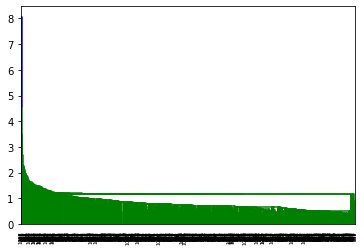

In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
X1n = StandardScaler().fit_transform(X1)
mergings = linkage(X1n,method='single')#ward: start by closest
dendrogram(mergings,
    leaf_rotation=90)
plt.show()

In [4]:
labels = fcluster(mergings, 2, criterion='distance')
df['hcluster2'] = labels
df.groupby('hcluster2').count()

,pokedex_number,name,generation,status,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate
hcluster2,,,,,,,,,,,,,,,,,,,,
1,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1015,1015,1015,1015,1015,1015,535,1015,1015,1015,1015,1015,1015,1015,1015,1015,912,912,912,1014
3,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


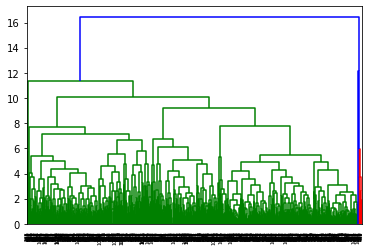

In [5]:
mergings = linkage(X1n,method='complete')#ward: start by closest
dendrogram(mergings,
    leaf_rotation=90)
plt.show()

In [9]:
df.groupby('hcluster').agg({'name':'first','total_points':'mean','hp':'mean','attack':'mean','defense':'mean',
                           'sp_attack':'mean','sp_defense':'mean','speed':'mean','hcluster':'count'})

,name,total_points,hp,attack,defense,sp_attack,sp_defense,speed,hcluster
hcluster,,,,,,,,,
1,Chansey,567.000000,236.000000,54.000000,47.250000,74.500000,97.000000,58.250000,4
2,Mega Venusaur,528.814815,76.880952,101.822751,78.798942,94.507937,82.727513,94.076720,378
3,Venusaur,479.078431,78.333333,85.818627,105.044118,72.691176,82.254902,54.936275,204
4,Bulbasaur,332.730858,57.368910,59.074246,54.180974,53.742459,55.320186,53.044084,431
5,Shuckle,540.000000,56.000000,57.500000,155.500000,63.000000,162.000000,46.000000,10
6,Eternatus Eternamax,1125.000000,255.000000,115.000000,250.000000,125.000000,250.000000,130.000000,1


We see that in cluster number 6 there is only one pokemon, which has absurdly big status. I agree in the fact that this pokemon deserve its own cluster. In cluster 1 it looks like there are pokemon with a lot of hp, and this implies that they have a lot of total_points. Cluster 5 give us pokemon with a lot of defense and sp_defense.

Appart from that, cluster 2 looks like the strong ones, cluster 4  of the weak ones. And  cluster 3 looks like a middle point.
But since there are a lot of elements in these groups there might be more patterns to discover

In [10]:
labels = fcluster(mergings, 6, criterion='distance')
df['hcluster_'] = labels
df.groupby('hcluster_').agg({'name':'first','total_points':'mean','hp':'mean','attack':'mean','defense':'mean',
                           'sp_attack':'mean','sp_defense':'mean','speed':'mean','hcluster':'count'})

,name,total_points,hp,attack,defense,sp_attack,sp_defense,speed,hcluster
hcluster_,,,,,,,,,
1,Chansey,567.000000,236.000000,54.000000,47.250000,74.500000,97.000000,58.250000,4
2,Deoxys Normal Forme,590.000000,57.000000,155.666667,35.666667,155.666667,35.666667,150.333333,3
3,Beedrill,477.154930,71.981221,99.234742,71.291080,72.915493,68.784038,92.948357,213
4,Charizard,549.760000,74.190000,85.240000,76.710000,122.610000,97.700000,93.310000,100
5,Mega Venusaur,669.548387,99.016129,134.854839,110.048387,120.403226,108.758065,96.467742,62
6,Cloyster,548.384615,87.538462,121.538462,175.538462,55.000000,63.846154,44.923077,13
7,Sandshrew,329.206897,45.689655,65.034483,98.896552,33.344828,54.103448,32.137931,29
8,Venusaur,500.345679,83.438272,86.672840,100.487654,81.154321,88.771605,59.820988,162
9,Wigglytuff,477.785714,117.714286,106.035714,72.714286,61.250000,72.678571,47.392857,28


This looks like a reasonable amount of clusters to keep. And these elements also look like a reasonable pattern
- Cluster 1: Extremely high hp and relatively high sp_defense
- Cluster 2: Extremely high attack, sp_attack and speed
- Cluster 3: Regular in all stats and relatively high attack and speed
- Cluster 4: Extremely high in sp_attack, relatively high in sp_defense and regular in all stats
- Cluster 5: Extremely strong
- Cluster 6: Extremely high defense
- Cluster 7: The weak ones with relatively high defense
- Cluster 8: The balanced with relatively high defense
- Cluster 9: Less than balanced with relatively high hp and attack
- Cluster 10: The weak ones
- Cluster 11: Pokemon with high defense and sp defense
- Cluster 12: The pkmn with ridiculus stats

We have reached a good state, let us try a different approach

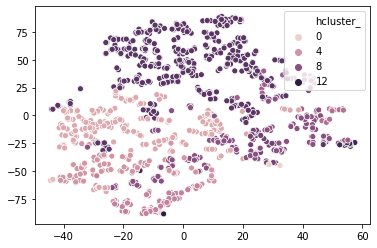

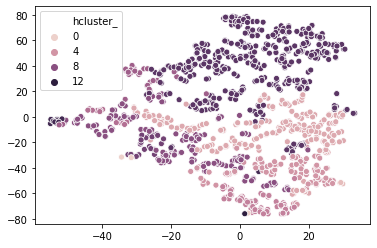

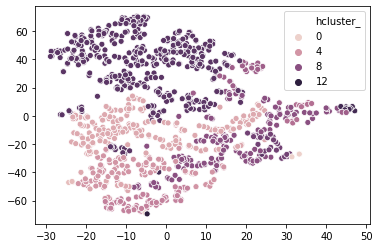

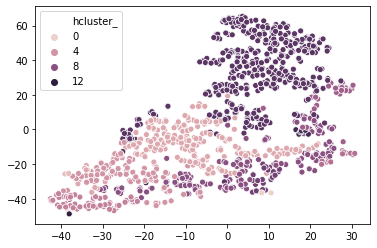

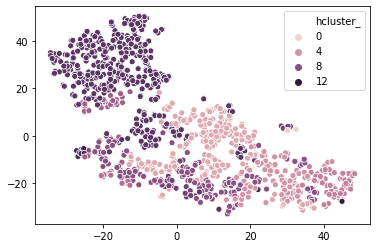

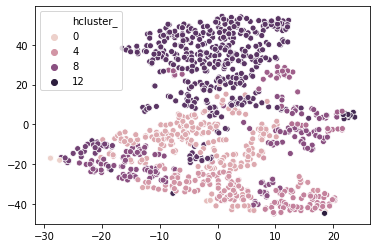

In [17]:
from sklearn.manifold import TSNE
import seaborn as sns
for j,i in enumerate(range(10,40,5)):
    plt.figure(j)
    model = TSNE(learning_rate=200,perplexity=i)
    transformed = model.fit_transform(X1n)
    xs = transformed[:,0]
    ys = transformed[:,1]
    sns.scatterplot(xs,ys,hue=df.hcluster_)